In [ ]:
import numpy as np 
import pandas as pd 
import os
import re
import matplotlib.pyplot as plt
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU, LSTM, Bidirectional
from keras.layers.embeddings import Embedding
from keras.initializers import Constant
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [ ]:
data_1 = pd.read_csv("regt_27.csv")
data_2 = pd.read_csv("sar_27.csv")
data =  pd.concat([data_1, data_2])
data.head(8)

,date_time,tweet,splchar1,splchar2,is_sarcastic
0,27-04-2021 02:34,b'I got a free sample of @Zevia root beer toda...,b'Bandlero',b'Kansas City',0
1,26-04-2021 21:33,b'https://t.co/9CiZb5acQf\n\nAmerican Truckers...,b'liftkits4less',"b'Las Vegas, NV'",0
2,26-04-2021 17:25,b'The people at @tacobell know me enough at th...,b'LookItsMikeO',b'My own little world',0
3,26-04-2021 13:56,"b'Join 5 people right now at ""Apple and Facebo...",b'tech_cheers',b'In the cloud',0
4,26-04-2021 12:56,b'Simulation study underscores the #need for #...,b'Rndubois',"b'Charleston, SC'",0
5,26-04-2021 09:25,b'\xf0\x9f\x93\xa2 The #IGARSS2021 team is exc...,b'Igarss2021',"b'Brussels, Belgium'",0
6,26-04-2021 08:44,b'@Amref_Kenya @MOH_Kenya @weks_note @YoutHub_...,b'Njeruh',b'Kenya E.africa',0
7,26-04-2021 07:58,b'Excited to share the latest addition to my #...,b'RF_Vintage',"b'North Carolina, USA'",0


In [ ]:
def clean_text(text):
    text = text.lower()
    
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text = pattern.sub('', text)
    text = " ".join(filter(lambda x:x[0]!='@', text.split()))
    emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    text = emoji.sub(r'', text)
    text = text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)        
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text) 
    text = re.sub(r"\'ll", " will", text)  
    text = re.sub(r"\'ve", " have", text)  
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"did't", "did not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"have't", "have not", text)
    text = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-]", "", text)
    return text

In [ ]:
print(data)

             date_time  ... is_sarcastic
0     27-04-2021 02:34  ...            0
1     26-04-2021 21:33  ...            0
2     26-04-2021 17:25  ...            0
3     26-04-2021 13:56  ...            0
4     26-04-2021 12:56  ...            0
...                ...  ...          ...
1692  19-04-2021 04:07  ...            1
1693  19-04-2021 04:01  ...            1
1694  19-04-2021 03:33  ...            1
1695  19-04-2021 03:08  ...            1
1696  19-04-2021 03:02  ...            1

[1733 rows x 5 columns]


In [ ]:
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def CleanTokenize(df):
    tweets = list()
    lines = df["tweet"].values.tolist()

    for line in lines:
        line = clean_text(line)
        # tokenize the text
        tokens = word_tokenize(line)
        # remove puntuations
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        # remove non alphabetic characters
        words = [word for word in stripped if word.isalpha()]
        stop_words = set(stopwords.words("english"))
        # remove stop words
        words = [w for w in words if not w in stop_words]
        tweets.append(words)
    return tweets

tweets = CleanTokenize(data)
tweets[0:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['bi',
  'got',
  'free',
  'sample',
  'root',
  'beer',
  'today',
  'maybe',
  'smells',
  'like',
  'root',
  'beer',
  'taste'],
 ['b',
  'truckers',
  'want',
  'chevy',
  'silverado',
  'configurationnnchevy',
  'short',
  'bed'],
 ['bthe',
  'people',
  'know',
  'enough',
  'point',
  'give',
  'sauces',
  'drink',
  'ice'],
 ['bjoin',
  'people',
  'right',
  'apple',
  'facebook',
  'maybe',
  'regular',
  'governmental',
  'regulations',
  'work'],
 ['bsimulation',
  'study',
  'underscores',
  'need',
  'regular',
  'testing',
  'among',
  'children'],
 ['team',
  'excited',
  'announce',
  'new',
  'format',
  'oralsessions',
  'numerous',
  'request'],
 ['bamrefkenya', 'parent', 'granny', 'brother', 'sister', 'one'],
 ['bexcited',
  'share',
  'latest',
  'addition',
  'etsy',
  'shop',
  'wrangler',
  'high',
  'waist',
  'jeans',
  'vintage',
  'wrangler',
  'jeans'],
 ['bexcited',
  'share',
  'latest',
  'addition',
  'etsy',
  'shop',
  'wrangler',
  'high',
  'wai

(-0.5, 999.5, 499.5, -0.5)

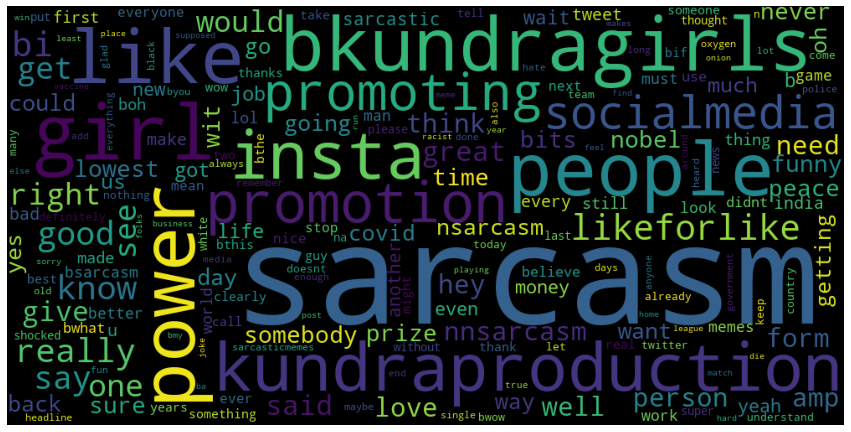

In [ ]:
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator
pos_data = data.loc[data['is_sarcastic'] == 1]
pos_head_lines = CleanTokenize(pos_data)
pos_lines = [j for sub in pos_head_lines for j in sub] 
word_could_dict=Counter(pos_lines)

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

In [ ]:
validation_split = 0.2
max_length = 25


tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(tweets)
sequences = tokenizer_obj.texts_to_sequences(tweets)

word_index = tokenizer_obj.word_index
print("unique tokens - ",len(word_index))
vocab_size = len(tokenizer_obj.word_index) + 1
print('vocab size -', vocab_size)

lines_pad = pad_sequences(sequences, maxlen=max_length, padding='post')
sentiment =  data['is_sarcastic'].values

indices = np.arange(lines_pad.shape[0])
np.random.shuffle(indices)
lines_pad = lines_pad[indices]
sentiment = sentiment[indices]

num_validation_samples = int(validation_split * lines_pad.shape[0])

X_train_pad = lines_pad[:-num_validation_samples]
y_train = sentiment[:-num_validation_samples]
X_test_pad = lines_pad[-num_validation_samples:]
y_test = sentiment[-num_validation_samples:]

unique tokens -  5909
vocab size - 5910


In [ ]:
print('Shape of X_train_pad:', X_train_pad.shape)
print('Shape of y_train:', y_train.shape)

print('Shape of X_test_pad:', X_test_pad.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train_pad: (1387, 25)
Shape of y_train: (1387,)
Shape of X_test_pad: (346, 25)
Shape of y_test: (346,)


In [ ]:
embeddings_index = {}
embedding_dim = 100
f = open(os.path.join('','glove.twitter.27B.100d.txt'), encoding = "utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 182889 word vectors.


In [ ]:
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
c = 0
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        c+=1
        embedding_matrix[i] = embedding_vector
print(c)

3836


In [ ]:
embedding_layer = Embedding(len(word_index) + 1,
                            embedding_dim,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=False)

**RNN NETWORK**

In [ ]:
model = Sequential()
model.add(embedding_layer)
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

print('Summary of the built model...')
print(model.summary())

Summary of the built model...
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 25, 100)           591000    
_________________________________________________________________
lstm_9 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 633,305
Trainable params: 42,305
Non-trainable params: 591,000
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train_pad, y_train, batch_size=32, epochs=10, validation_data=(X_test_pad, y_test), verbose=2)


Epoch 1/10
44/44 - 5s - loss: 0.2636 - acc: 0.9647 - val_loss: 0.0776 - val_acc: 0.9855
Epoch 2/10
44/44 - 1s - loss: 0.0747 - acc: 0.9863 - val_loss: 0.0772 - val_acc: 0.9855
Epoch 3/10
44/44 - 1s - loss: 0.0728 - acc: 0.9863 - val_loss: 0.0779 - val_acc: 0.9855
Epoch 4/10
44/44 - 1s - loss: 0.0721 - acc: 0.9827 - val_loss: 0.0811 - val_acc: 0.9855
Epoch 5/10
44/44 - 1s - loss: 0.0524 - acc: 0.9877 - val_loss: 0.0991 - val_acc: 0.9740
Epoch 6/10
44/44 - 1s - loss: 0.0468 - acc: 0.9899 - val_loss: 0.0919 - val_acc: 0.9798
Epoch 7/10
44/44 - 1s - loss: 0.0414 - acc: 0.9913 - val_loss: 0.0871 - val_acc: 0.9798
Epoch 8/10
44/44 - 1s - loss: 0.0425 - acc: 0.9892 - val_loss: 0.0891 - val_acc: 0.9827
Epoch 9/10
44/44 - 1s - loss: 0.0373 - acc: 0.9906 - val_loss: 0.0840 - val_acc: 0.9855
Epoch 10/10
44/44 - 1s - loss: 0.0354 - acc: 0.9921 - val_loss: 0.0898 - val_acc: 0.9827


**VALIDATION LOSS AND ACCURACY OF RNN**


In [ ]:
scores_rnn_train = model.evaluate(X_train_pad, y_train, verbose=2)
print("training_loss: %.2f%%" % (scores_rnn_train[0]*100))
print("training_Accuracy: %.2f%%" % (scores_rnn_train[1]*100))

44/44 - 0s - loss: 0.0273 - acc: 0.9935
training_loss: 2.73%
training_Accuracy: 99.35%


In [ ]:
scores_rnn_val = model.evaluate(X_test_pad, y_test, verbose=2)
print("validation_loss: %.2f%%" % (scores_rnn_val[0]*100))
print("validation_Accuracy: %.2f%%" % (scores_rnn_val[1]*100))


11/11 - 0s - loss: 0.0898 - acc: 0.9827
validation_loss: 8.98%
validation_Accuracy: 98.27%


**TRAINING LOSS AND ACCCURACY OF RNN**

In [ ]:
scores_rnn_train = model.evaluate(X_train_pad, y_train, verbose=2)
print("training_loss: %.2f%%" % (scores_rnn_train[0]*100))
print("training_Accuracy: %.2f%%" % (scores_rnn_train[1]*100))

44/44 - 0s - loss: 0.0273 - acc: 0.9935
training_loss: 2.73%
training_Accuracy: 99.35%


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

**TRAINING PERFORMANCE METRICS**

In [ ]:
yhat_classes = model.predict_classes(X_train_pad , verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



44/44 - 0s


In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_train, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_train, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_train, yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 0.993511
Precision: 0.994143
Recall: 0.999264
F1 score: 0.996697


In [ ]:
matrix = confusion_matrix(y_train, yhat_classes)
print(matrix)

[[  20    8]
 [   1 1358]]


**VALIDATION PERFORMANCE METRICS**

In [ ]:
yhat_classes = model.predict_classes(X_test_pad, verbose=2)

11/11 - 0s


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



In [ ]:

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 0.982659
Precision: 0.985380
Recall: 0.997041
F1 score: 0.991176


In [ ]:
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

[[  3   5]
 [  1 337]]


**PLOT OF RNN**

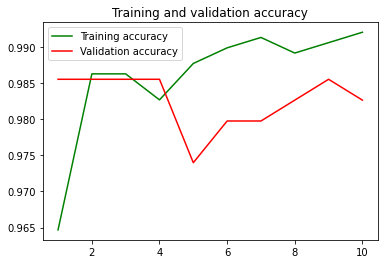

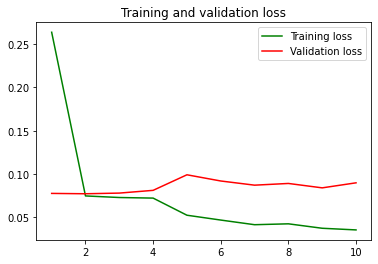

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**CNN NETWORK**


In [ ]:

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import nltk
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from sklearn.manifold import TSNE

In [ ]:
model_glove = Sequential()
model_glove.add(Embedding(vocab_size , 100, input_length=50, weights=[embedding_matrix], trainable=False))
model_glove.add(Dropout(0.2))
model_glove.add(Conv1D(64, 5, activation='relu'))
model_glove.add(MaxPooling1D(pool_size=4))
model_glove.add(LSTM(100))
model_glove.add(Dense(1, activation='sigmoid'))
model_glove.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print('Summary of the built model...')
print(model_glove.summary())

Summary of the built model...
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 50, 100)           591000    
_________________________________________________________________
dropout_5 (Dropout)          (None, 50, 100)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 46, 64)            32064     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 11, 64)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 100)               66000     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 689,165
Trainable params: 98,165
Non-trainable params: 591,000
____________

In [ ]:
history = model_glove.fit(X_train_pad, y_train, batch_size=32, epochs=10, validation_data=(X_test_pad, y_test),verbose=2)

Epoch 1/10
44/44 - 3s - loss: 0.1930 - accuracy: 0.9625 - val_loss: 0.1091 - val_accuracy: 0.9769
Epoch 2/10
44/44 - 1s - loss: 0.0889 - accuracy: 0.9798 - val_loss: 0.0853 - val_accuracy: 0.9855
Epoch 3/10
44/44 - 1s - loss: 0.0659 - accuracy: 0.9863 - val_loss: 0.0849 - val_accuracy: 0.9855
Epoch 4/10
44/44 - 1s - loss: 0.0488 - accuracy: 0.9849 - val_loss: 0.0934 - val_accuracy: 0.9798
Epoch 5/10
44/44 - 1s - loss: 0.0282 - accuracy: 0.9935 - val_loss: 0.0936 - val_accuracy: 0.9855
Epoch 6/10
44/44 - 1s - loss: 0.0090 - accuracy: 0.9971 - val_loss: 0.1184 - val_accuracy: 0.9769
Epoch 7/10
44/44 - 1s - loss: 0.0050 - accuracy: 0.9993 - val_loss: 0.1329 - val_accuracy: 0.9769
Epoch 8/10
44/44 - 1s - loss: 0.0063 - accuracy: 0.9986 - val_loss: 0.1412 - val_accuracy: 0.9653
Epoch 9/10
44/44 - 1s - loss: 0.0080 - accuracy: 0.9971 - val_loss: 0.1053 - val_accuracy: 0.9798
Epoch 10/10
44/44 - 1s - loss: 0.0087 - accuracy: 0.9978 - val_loss: 0.0947 - val_accuracy: 0.9827


**VALIDATION LOSS AND ACCURACY OF CNN**


In [ ]:
scores_cnn_train = model_glove.evaluate(X_test_pad, y_test, verbose=2)
print("validation_loss: %.2f%%" % (scores_cnn_train[0]*100))
print("validation_Accuracy: %.2f%%" % (scores_cnn_train[1]*100))

11/11 - 0s - loss: 0.0947 - accuracy: 0.9827
validation_loss: 9.47%
validation_Accuracy: 98.27%


**TRAINING LOSS AND ACCURACY OF CNN**

In [ ]:
scores_cnn_val = model_glove.evaluate(X_train_pad, y_train, verbose=2)
print("training_loss: %.2f%%" % (scores_cnn_val[0]*100))
print("training_Accuracy: %.2f%%" % (scores_cnn_val[1]*100))

44/44 - 0s - loss: 0.0047 - accuracy: 0.9993
training_loss: 0.47%
training_Accuracy: 99.93%


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

**TRAINING PERFORMANCE METRICS**

In [ ]:
yhat_classes = model_glove.predict_classes(X_train_pad, verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



44/44 - 1s


In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_train, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_train, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_train, yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 0.999279
Precision: 0.999265
Recall: 1.000000
F1 score: 0.999632


In [ ]:
matrix = confusion_matrix(y_train, yhat_classes)
print(matrix)

[[  27    1]
 [   0 1359]]


**VALIDATION PERFORMANCE METRICS**

In [ ]:
yhat_classes = model_glove.predict_classes(X_test_pad, verbose=2)

11/11 - 0s


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 0.982659
Precision: 0.985380
Recall: 0.997041
F1 score: 0.991176


In [ ]:
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

[[  3   5]
 [  1 337]]


**PLOT FOR CNN**

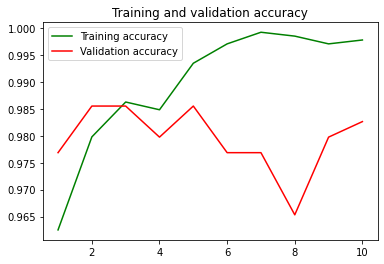

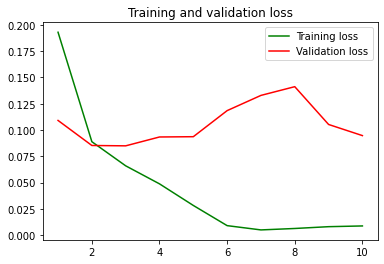

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**TESTING**


In [ ]:
def predict_sarcasm_rnn(s):
    print(s)
    x_final = pd.DataFrame({"tweet":[s]})
    test_lines = CleanTokenize(x_final)
    test_sequences = tokenizer_obj.texts_to_sequences(test_lines)
    test_review_pad = pad_sequences(test_sequences, maxlen=max_length, padding='post')
    pred = model.predict(test_review_pad)
    pred*=100
    if pred[0][0]>=50: print("It's a sarcasm!") 
    else: print("It's not a sarcasm.")

In [ ]:
def predict_sarcasm_cnn(s):
    print(s)
    x_final = pd.DataFrame({"tweet":[s]})
    test_lines = CleanTokenize(x_final)
    test_sequences = tokenizer_obj.texts_to_sequences(test_lines)
    test_review_pad = pad_sequences(test_sequences, maxlen=max_length, padding='post')
    pred = model_glove.predict(test_review_pad)
    pred*=100
    if pred[0][0]>=50: print("It's a sarcasm!") 
    else: print("It's not a sarcasm.")

In [ ]:
import csv 
 


In [ ]:
with open('predicts.txt','r') as csv_file: #Opens the file in read mode
        for line in csv_file:
            predict_sarcasm_rnn(line)

b'Excited to share the latest addition to my #etsy shop: Vintage Ralph Lauren Polo Men\'s Long Sleeve Shirt ""Blake"" L\xe2\x80\xa6 https://t.co/Nif7itbycR'

It's not a sarcasm.
b'@shrenik0911 How can Govt stay without intervening in such things? 
It's a sarcasm!


In [ ]:
predict_sarcasm_rnn("I was depressed. He asked me to be happy. I am not depressed anymore.")

I was depressed. He asked me to be happy. I am not depressed anymore.
It's a sarcasm!


In [ ]:
predict_sarcasm_cnn("New PNG Today - Triangle Square Angle Red #square #regular polygon #point  https://t.co/41lvfujHiv Visit our site! https://t.co/hcsPjQHT0O")

New PNG Today - Triangle Square Angle Red #square #regular polygon #point  https://t.co/41lvfujHiv Visit our site! https://t.co/hcsPjQHT0O
It's not a sarcasm.


**COMPARISON**

In [ ]:
if (scores_rnn_train[1] > scores_cnn_train[1]):
     st = "RNN IS BETTER COMPARED TO CNN by comparing training accuracy"
     print(st)

else:
     st="CNN IS BETTEER COMPARED TO RNN by comparing training accuracy"
     print(st)


CNN IS BETTEER COMPARED TO RNN by comparing training accuracy


In [ ]:
if (scores_rnn_val[1] > scores_cnn_val[1]):
     st = "RNN IS BETTER COMPARED TO CNN by comparing validation accuracy"
     print(st)

else:
     st="CNN IS BETTEER COMPARED TO RNN by comparing validation accuracy"
     print(st)

CNN IS BETTEER COMPARED TO RNN by comparing validation accuracy


In [ ]:
if (scores_rnn_train[0] < scores_cnn_train[0]):
     st = "RNN IS BETTER COMPARED TO CNN by comparing training loss"
     print(st)

else:
     st="CNN IS BETTEER COMPARED TO RNN by comparing training loss"
     print(st)

CNN IS BETTEER COMPARED TO RNN by comparing training loss


In [ ]:
if (scores_rnn_val[0] < scores_cnn_val[0]):
     st = "RNN IS BETTER COMPARED TO CNN by comparing validation loss"
     print(st)

else:
     st="CNN IS BETTEER COMPARED TO RNN by comparing validation loss"
     print(st)

CNN IS BETTEER COMPARED TO RNN by comparing validation loss
